## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

Все признаки в датасете - количественные. Категориальных - нет

In [16]:
X.isna().sum().sum() or X.empty 


False

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [19]:
from tables import indexes
output_m = [[]for i in range(6)]
i=0
clfr_list=[]
scalar = StandardScaler()
scaled_X_train = scalar.fit_transform(X_train[['alcohol', 'magnesium']]) 
scaled_X_test = scalar.fit_transform(X_test[['alcohol', 'magnesium']])
for k in (1, 3, 5, 10, 15, 25):
      clfr = KNeighborsClassifier(n_neighbors=k, p=2).fit(scaled_X_train, y_train)
      clfr_list.append(clfr)
      y0_predicted = clfr.predict(scaled_X_train)
      y_predicted = clfr.predict(scaled_X_test)
      val0_accuracy = np.mean(y0_predicted == y_train)
      val_accuracy = np.mean(y_predicted == y_test)
      output_m[i]=[k, val0_accuracy, val_accuracy]
      i+=1

pd.DataFrame(data = output_m, columns = ['NN','Train','Test'], index=[i for i in range(1, 7)])


,NN,Train,Test
1,1,0.991935,0.648148
2,3,0.814516,0.722222
3,5,0.830645,0.722222
4,10,0.758065,0.740741
5,15,0.733871,0.685185
6,25,0.701613,0.648148


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [20]:
!pip install mlxtend==0.19.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [21]:
%pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.19.0
    Uninstalling mlxtend-0.19.0:
      Successfully uninstalled mlxtend-0.19.0


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [22]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

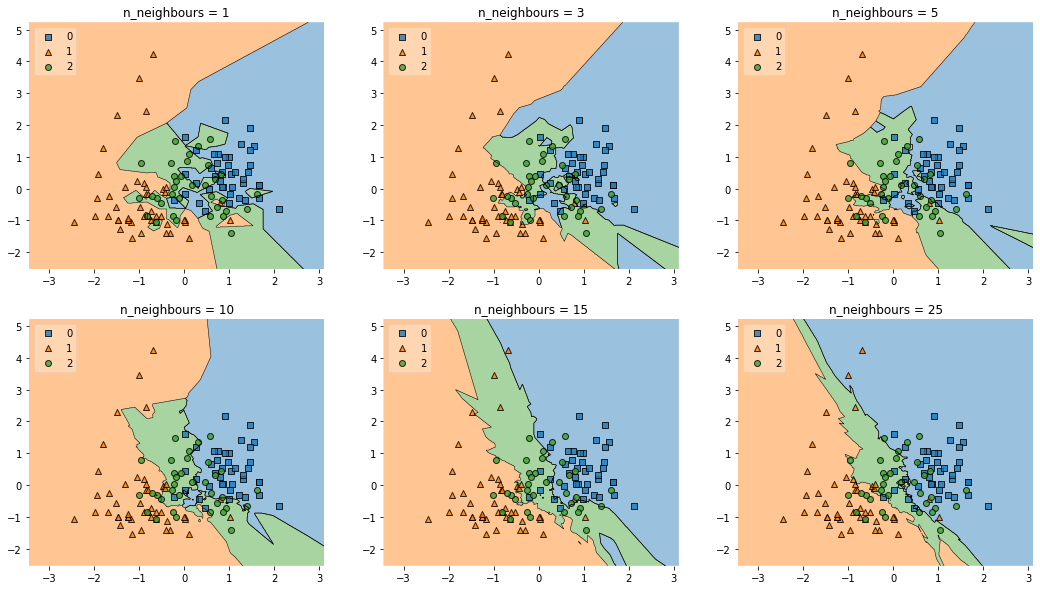

In [23]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

labels = ['1', '3', '5', '10', '15', '25']

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(18,10))

for clf, lab, grd in zip(clfr_list,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=scaled_X_train, y=y_train, clf=clf, legend=2)
    plt.title('n_neighbours = '+lab)

# X_train[['alcohol', 'magnesium']].to_numpy()

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

При выборе малого количества соседей, образуется слишком много отдельных регионов, что вредит модели - на неё очень сильно влияют "шумовые" объекты. С увеличением количества соседей, поверхность становится более равномерно распределенной и, например, оранжевая область перестает захватывать всё пространство. При этом при значительном увеличении количества соседей (рассмотрим 25), области становятсч весьма размытыми и пытаются захватить все большее пространство, хотя там совсем мало объектов-представителей класса. Оптимальным в данной задаче оказывается количество соседей равное 10-15, так как позволяет выделить скопления объектов определенных класов более точно и вернее предсказать расположение новых объектов. На мой взгляд, 10 соседей подходит идеально, так как дает очень хорошее представление об областях нахождения каждого объекта: есть вырез под большое скопление синих объектов между зелеными, область над зелеными объектами занята оранжевой плоскость, как и должно быть. Кроме того, из задания 1.3 видно, что при 10 соседях не возникает переобучения и что на тестовой, что на обучающей выборке результат примерно одинаковый, потому что модель, обучившись, дает верные ответы относительно своего представления об объектах.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

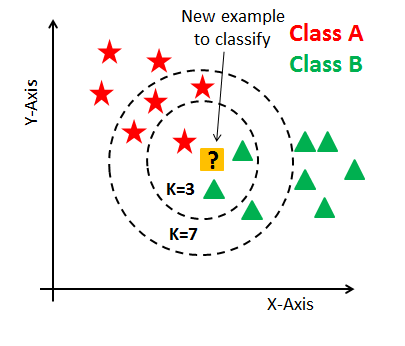

In [24]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
    
    def predict(self, X):
      predict=[]
      for x in X:
        x_dist = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
        cl_dist = np.column_stack((self.y_train, x_dist))
        cl = cl_dist[cl_dist[:,1].argsort()]
        predict.append(Counter((cl[0:self.k,0].astype('int32'))).most_common(1)[0][0])

      return np.array(predict)


In [25]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [26]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [27]:
data = pd.read_csv("https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [28]:
data.isna().sum().sum() or data.empty

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [29]:
data = data.drop('Unnamed: 0', axis=1)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [30]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Считается, что чем дальше корреляционное число от нуля, тем сильнее связь между переменными. В таком случае, можно утверждать, что больше все коррелируется с целевой переменной price переменные carat (0.92) и перемнные размера бриллианта (≈0.87 для всех)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

Категориальные признаки: cut, color, clarity.

In [31]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [32]:
dataX_train, dataX_test, datay_train, datay_test = train_test_split(data.drop('price', axis=1), data['price'], test_size=0.3, random_state=30)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [33]:
scalar2 = StandardScaler()
scaled_dataX_train = scalar2.fit_transform(dataX_train) 
scaled_dataX_test = scalar2.fit_transform(dataX_test)


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(scaled_dataX_train, datay_train)
predictions = reg.predict(scaled_dataX_test)
mse = mean_squared_error(datay_test, predictions) 
print(mse)

1300364.3604131304


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [35]:
pd.DataFrame(reg.coef_, index=list(data.drop('price', axis=1)), columns=['coeff'])

,coeff
carat,5397.235762
depth,-101.016005
table,-58.722355
x,-1204.453513
y,10.629249
z,-24.329104
cut_Fair,-124.054853
cut_Good,-44.086055
cut_Ideal,56.504981
cut_Premium,14.724357


Очевидно, что коэффициенты таких признаков, как carat и x значительно превышают все остальные.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [46]:
from sklearn import linear_model
clfL = linear_model.Lasso(alpha=10).fit(scaled_dataX_train, datay_train)
clfR = linear_model.Ridge(alpha=10).fit(scaled_dataX_train, datay_train)

pd.DataFrame(data=np.vstack((clfL.coef_, clfR.coef_)).T, index=list(data.drop('price', axis=1)), columns=['coeff_L', 'coeff_r'])

,coeff_L,coeff_r
carat,4885.365825,5355.045987
depth,-65.653885,-98.150762
table,-45.055246,-58.420497
x,-691.568791,-1155.646206
y,-0.000000,7.386527
z,-35.739225,-28.809607
cut_Fair,-125.111072,-124.284724
cut_Good,-44.401808,-44.194854
cut_Ideal,48.392368,56.487692
cut_Premium,0.000000,14.705706


К сожалению, веса на признаках carat и x уменьшились не сильно, больший эффект произошел на Lasso-регрессии - коэффициенты уменьшились примерно на 500-600 едениц. Проблема мультиколлинеарности и в изначальной регрессии проявлялась слишком сильно. 

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.394e+08, tolerance: 5.989e+07
  model = cd_fast.enet_coordinate_descent(


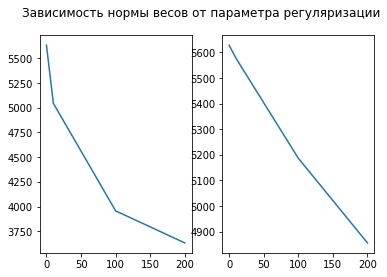

In [50]:
alpha = [0.1, 1, 10, 100, 200]
weight_normsL=[]
for i in alpha:
  clf_temp = linear_model.Lasso(alpha=i).fit(scaled_dataX_train, datay_train)
  weight_normsL.append(np.linalg.norm(clf_temp.coef_))

weight_normsR=[]
for i in alpha:
  clf_temp = linear_model.Ridge(alpha=i).fit(scaled_dataX_train, datay_train)
  weight_normsR.append(np.linalg.norm(clf_temp.coef_))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Зависимость нормы весов от параметра регуляризации')
ax1.plot(alpha, weight_normsL)
ax2.plot(alpha, weight_normsR)

Из графиков видно, что Lasso-регрессия уменьшает веса агрессивне, т.к., например, при α=100 норма коэффициентов падает с 5000 до ≈3800. Особенности Lasso заключается в её склонности к занулению коэффициентов (это видно и в таблице к заданию 3.9), поэтому её используются для отбора признаков

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [77]:
clfCV = linear_model.LassoCV(alphas=alpha, cv=5).fit(scaled_dataX_train, datay_train)
pd.DataFrame(data=clfCV.mse_path_.mean(axis=1).astype('int64'), index=clfCV.alphas_.astype('int32'), columns=['mse.mean'])

,mse.mean
200,1942625
100,1523321
10,1282314
1,1270438
0,1270957


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [75]:
clf_ready = linear_model.Lasso(alpha=1).fit(scaled_dataX_train, datay_train)
pd.DataFrame(clf_ready.coef_, index=list(data.drop('price', axis=1)), columns=['coeff'])

,coeff
carat,5346.815975
depth,-97.743760
table,-57.392089
x,-1145.745723
y,-0.000000
z,-24.251801
cut_Fair,-129.293463
cut_Good,-52.595257
cut_Ideal,41.128739
cut_Premium,0.000000


Информация о цвете и размере оказалась самой не информативной, а такие признаки, как carat и clarity внесли большой вклад.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [76]:
predictions_r = clf_ready.predict(scaled_dataX_test)
mse = mean_squared_error(datay_test, predictions_r) 
print(mse)

1299348.5847719256


Так как ошибка в этой моделе стала меньше, то лучше использовать её, с другой стороны, ошибка не сильно уменьшила, а трудозатраты на поиск лучшего рещения оказалась весьма и веьсма большими, поэтому, возможно, проще и лучше использовать изначальную простую модель линейной регрессии. 
Скорее всего, модель стала лучше, потому что мы смогли немного уменьшит слишком большие коэффициенты и удачно занулить не такие важные параметры, подобрав оптимальный вариант регуляризации и оптимальную линейную комбинацию.